# SVM

Here's some code to generate a mixture of gaussians. Each point is associated with one 2D gaussian distribution with fixed center and dispersion matrix. The label of the point corresponds to the center of its distribution. A plot is made showing the 3 categories

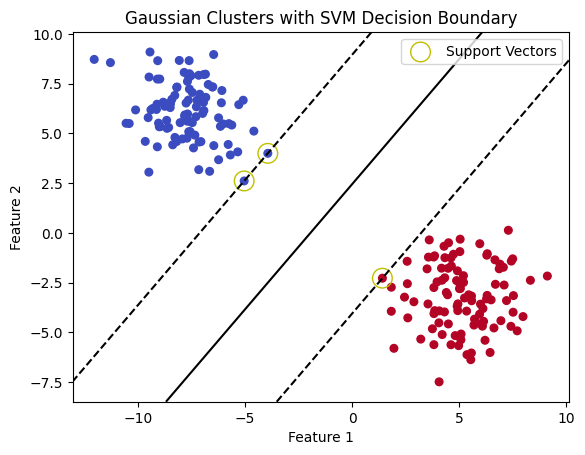

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Step 1: Generate 2D Gaussian clusters
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.5)

# Step 2: Train the SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Step 3: Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
plt.title("Gaussian Clusters with SVM Decision Boundary")

# Step 4: Plot the decision boundary
# Create a mesh to plot
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
            facecolors='none', edgecolors='y', label='Support Vectors')

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Non-linear SVM

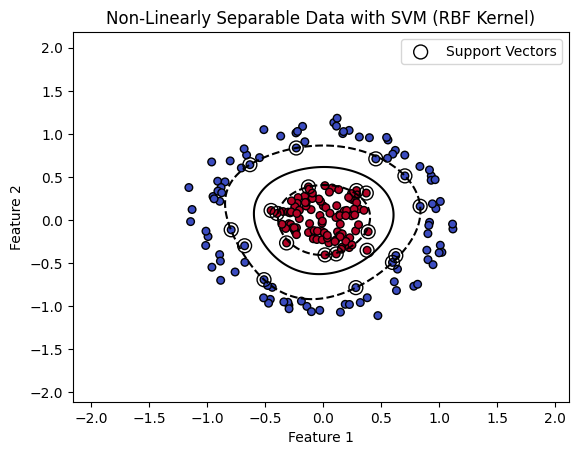

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles

# Step 1: Generate non-linearly separable data
X, y = make_circles(n_samples=200, factor=0.25, noise=0.1, random_state=42)

# Step 2: Train the SVM with an RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X, y)

# Step 3: Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')
plt.title("Non-Linearly Separable Data with SVM (RBF Kernel)")

# Step 4: Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 500),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 500))

Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# The RBF transformation

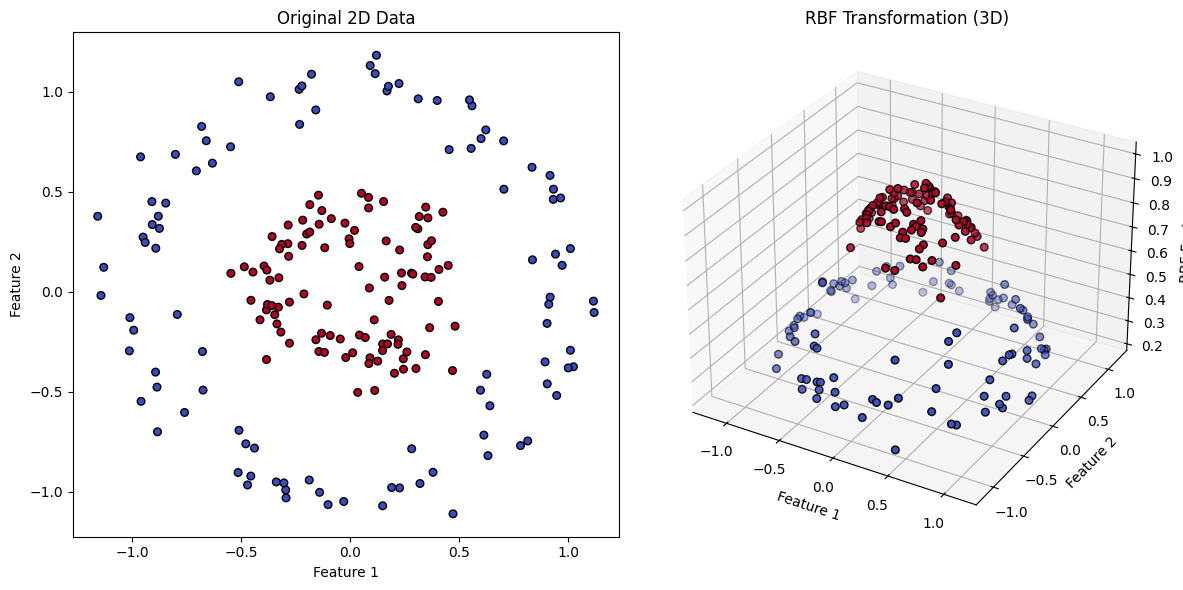

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate non-linearly separable data
X, y = make_circles(n_samples=200, factor=0.35, noise=0.1, random_state=42)

# Step 2: Define a radial basis function transformation
def rbf_transform(X, gamma=1.0):
    # Use the origin (0, 0) as the "center" for simplicity
    center = np.zeros(X.shape[1])
    return np.exp(-gamma * np.sum((X - center) ** 2, axis=1))

# Apply the transformation
gamma = 1.0  # RBF parameter
z = rbf_transform(X, gamma=gamma)

# Step 3: Train the SVM with RBF kernel
model = SVC(kernel='rbf', C=1.0, gamma=gamma)
model.fit(X, y)

# Step 4: Plot the original data
fig = plt.figure(figsize=(12, 6))

# Original 2D data
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')
ax1.set_title("Original 2D Data")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# 3D Transformed Data
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], z, c=y, cmap='coolwarm', s=30, edgecolors='k')
ax2.set_title("RBF Transformation (3D)")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("RBF Feature")

plt.tight_layout()
plt.show()


## Text Encodings

The **TF-IDF (Term Frequency-Inverse Document Frequency)** transformation is a statistical method used to evaluate the importance of a word (term) within a document relative to a corpus of documents. It is commonly used in text processing tasks like text classification, information retrieval, and clustering.

### Components of TF-IDF:
1. **Term Frequency (TF)**:
   - **Term Frequency** measures how often a word appears in a document. It's often normalized by the total number of terms in the document to prevent longer documents from having an advantage.
   
   Formula:
   $$
   \text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
   $$
   - Where:
     - $ t $ is a term (word).
     - $ d $ is a document.
     - The numerator is the count of how many times term \( t \) appears in document \( d \).
     - The denominator is the total number of terms in the document.

2. **Inverse Document Frequency (IDF)**:
   - **Inverse Document Frequency** measures how important a word is across all documents in the corpus. Words that are common across many documents (like "the", "is", "on") will have a low IDF because they don’t help distinguish between documents.
   
   Formula:
   $$
   \text{IDF}(t) = \log \left(\frac{N}{\text{df}(t)}\right)
   $$
   - Where:
     - $ N $ is the total number of documents in the corpus.
     - $ \text{df}(t) $ is the number of documents in which the term $ t $ appears.
     - If a term appears in every document, its IDF value will be low because it doesn’t help distinguish between documents.

3. **TF-IDF Calculation**:
   - The **TF-IDF** score is the product of **TF** and **IDF**. It gives a higher weight to terms that appear frequently in a document but are rare across the corpus. These terms are typically the most relevant for classifying or distinguishing documents.
   
   Formula:
   $$
   \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
   $$
   - This means that terms that appear frequently in a document but are rare across the corpus will have higher TF-IDF scores, indicating they are important for that document.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate

# Sample documents
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example documents (larger and more varied)
documents = [
    "I love this product! It's exactly what I was looking for. Highly recommend it to anyone.",
    "The phone is great, but the battery life is a bit disappointing. It could be better.",
    "Worst purchase ever! The screen cracked after a single drop. I will never buy from this brand again.",
    "The service was excellent, and the food was amazing. Would definitely come back.",
    "This is a fantastic book. The plot twists kept me on the edge of my seat. A must-read!",
    "I received my order late, and it was missing an item. Very poor customer service.",
    "Not as expected. The quality was cheap, and it broke within a few days of use.",
    "Amazing experience! The staff was friendly, and the ambiance was perfect. Highly recommend this restaurant.",
    "The movie was okay, but the pacing was slow. It could have been a lot better.",
    "The product works well for the price. It’s not the best quality, but it gets the job done."
]

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features = 10)

# Fit and transform the documents into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(documents)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to a dense format and display
dense_matrix = tfidf_matrix.todense()

# Print the feature names and their corresponding TF-IDF values for each document
df = pd.DataFrame(dense_matrix, columns=feature_names)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
df

,amazing,battery,better,broke,buy,highly,product,quality,recommend,service
0,0.00,0.00,0.00,0.00,0.00,0.58,0.58,0.00,0.58,0.00
1,0.00,0.76,0.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
3,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.71
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
6,0.00,0.00,0.00,0.76,0.00,0.00,0.00,0.65,0.00,0.00
7,0.58,0.00,0.00,0.00,0.00,0.58,0.00,0.00,0.58,0.00
8,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.71,0.00,0.00
